$$
\def\bra#1{\mathinner{\left\langle{#1}\right|}}
\def\ket#1{\mathinner{\left|{#1}\right\rangle}}
\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}
$$

# グローバーのアルゴリズムの計算

アルゴリズムの詳細については下記を参照のこと。

https://dojo.qulacs.org/ja/latest/notebooks/8.2_Grovers_algorithm.html

正解$\omega$のときだけ1、他は0になる関数$f_{\omega}(x)(xは0以上の整数)$を考える。正解の個数をK個とする。

また、M個のインデックスされた固有状態を持つ直行基底$\mathscr{M}=\{ \ket{m} (0 \leq m < M)\}$に対して、オラクル$U_{\omega}$を以下の様に定義する。

$$
    U_{\omega}\ket{m} = (-1)^{f_{\omega}(m)}\ket{m} (0 \leq m < M)
$$

これは$\omega$基底の成分のみ符号を反転させるため、下記のように表現できる。

$$
    U_{\omega} = 1 - 2\sum_{\omega}\ket{\omega}\bra{\omega}
$$

次に、$\mathscr{M}$の均一な混合状態を$\ket{s}$とする。

$$
    \ket{s} = \frac{1}{\sqrt{N}}\sum_i^N\ket{i}
$$

また下記を定義する。

$$
\begin{align}
    \ket{\alpha} &= \frac{1}{\sqrt{N-K}}\sum_{不正解}\ket{m}\\
    \ket{\beta}  &= \frac{1}{\sqrt{K}}\sum_{正解}\ket{m}\\
    &(\braket{\alpha}{\alpha}=1,\braket{\beta}{\beta}=1)
\end{align}
$$

$\ket{\alpha}$は$\ket{s}$の不正解の成分、$\ket{\beta}$は正解の成分である。すると$\ket{s}$は

$$
\begin{align}
    \ket{s} &= \frac{\sqrt{N-K}}{\sqrt{N}}\ket{\alpha} + \frac{\sqrt{K}}{\sqrt{N}}\ket{\beta}\\
    &= \cos\frac{\theta}{2}\ket{\alpha} + \sin\frac{\theta}{2}\ket{\beta}
\end{align}
$$

と書くことができる。

拡散演算子$U_s$を下記として定義する。

$$
    U_s = 2\ket{s}\bra{s} - 1
$$

各種計算。正解$\omega$の固有状態を $\ket{\omega}$と記載する。
 
$$
\begin{align}
    \hat{s} &= \ket{s}\bra{s} \\
    \hat{\omega} &= \sum_{正解}\ket{\omega}\bra{\omega} \\
    \hat{s} \ket{\alpha} &=\ket{s}\braket{s}{\alpha} \\
    &= \cos\frac{\theta}{2} (\cos\frac{\theta}{2}\ket{\alpha} + \sin\frac{\theta}{2}\ket{\beta}) \\
    &= \cos^2\frac{\theta}{2}\ket{\alpha} + \cos\frac{\theta}{2}\sin\frac{\theta}{2}\ket{\beta}\\
    \hat{s}\ket{\beta} &= \sin\frac{\theta}{2}\cos\frac{\theta}{2}\ket{\alpha} + \sin^2\frac{\theta}{2}\ket{\beta} \\
    \hat{\omega}\ket{\alpha} &= 0 \\ 
    \hat{\omega}\ket{\beta} &= \ket{\beta} \\
    U_s &= 2\hat{s} - 1 \\
    U_{\omega} &= 1 - 2\hat{\omega} \\
    U_{\omega}\ket{\alpha} &= \ket{\alpha} \\
    U_{\omega}\ket{\beta} &= -\ket{\beta} \\
    U_s\ket{\alpha} &= (2\cos^2\frac{\theta}{2}-1)\ket{\alpha} + 2\cos\frac{\theta}{2}\sin\frac{\theta}{2}\ket{\beta}\\
    &= \cos\theta\ket{\alpha} + \sin\theta\ket{\beta}\\ 
    U_s\ket{\beta} &= 2\cos\frac{\theta}{2}\sin\frac{\theta}{2}\ket{\alpha} - (1-\sin^2\frac{\theta}{2})\ket{\beta}\\
    &= \sin\theta\ket{\alpha} - \cos\theta\ket{\beta}\\
    U_sU_{\omega}(a\ket{\alpha} + b\ket{\beta}) &= U_s(a\ket{\alpha} - b\ket{\beta}) \\
    &= (a\cos\theta-b\sin\theta)\ket{\alpha} + (a\sin\theta + b\cos\theta)\ket{\beta}\\
    &= r(\cos\phi\cos\theta - \sin\phi\sin\theta)\ket{\alpha} + r(\cos\phi\sin\theta + \sin\phi\cos\theta)\ket{\beta} \\
    &(r = \sqrt{a^2+b^2}, \phi = \arccos(a/r)) \\
    &= r\cos(\phi+\theta)\ket{\alpha} + r\sin(\phi+\theta)\ket{\beta}
\end{align}
$$

$a,b$については波動関数が規格化されていることを要請すると、$r=1$としてよい。また実数であることを前提としてしまっているが、三角関数の合成が複素数で成立するかはわからない。また初期状態の係数が必ず実数にできるかもわからない。

上記から$U_sU_{\omega}$をかけるごとに$\theta$だけ位相が回ることがわかる。初期の角度は$\frac{\theta}{2}$なので、

$$
(U_sU_{\omega})^k\ket{s} = \cos(\frac{1+2k}{2}\theta)\ket{\alpha} + \sin(\frac{1+2k}{2}\theta)\ket{\beta}
$$

本題は$\ket{\beta}$が$\pm1$になることなので例えば1を取ると、$k=\frac{\pi-\theta}{2\theta}$がほぼ成立する場合では$\ket{\beta}$の発生確率が高くなる。

# 係数が複素数の場合

アダマール演算ができれば実数として良いのであまり意味がないが、念の為計算してみる。

複素数の位相の全体値はくくり出せるので、自由度としては1つになる。大きさ$r=1$とする。
$$
    \begin{align}
    a &= e^{i\psi}\cos\phi\\
    b &= e^{-i\psi}\sin\phi\\
    a'=&a\cos\theta - b\sin\theta \\
    =& \cos\psi(\cos\phi\cos\theta - \sin\phi\sin\theta) \\
    &+ i\sin\psi(\cos\phi\cos\theta + \sin\phi\sin\theta) \\
    =& \cos\psi\cos(\phi+\theta) + i \sin\psi\cos(\phi - \theta) \\
    b'=&a\sin\theta + b\cos\theta \\
    =& \cos\psi(\cos\phi\sin\theta + \sin\phi\cos\theta) \\
    &+ i\sin\psi(\cos\phi\sin\theta - \sin\phi\cos\theta) \\
    =& \cos\psi\sin(\phi+\theta) - i \sin\psi\sin(\phi - \theta)
    \end{align}
$$


$$
\begin{align}
    |a'| &= \sqrt{\cos^2\psi \cos^2(\phi+\theta) + \sin^2\psi\cos^2(\phi-\theta)}\\
    &= \cos\phi' \\
    \psi' &= (argc(b')- argc(a'))/2
\end{align}
$$

これ以上は難しそう。ちょっと手計算が大変なので数値計算してみる。計算自体は角度というよりa, bを使ったほうが楽。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
%matplotlib inline

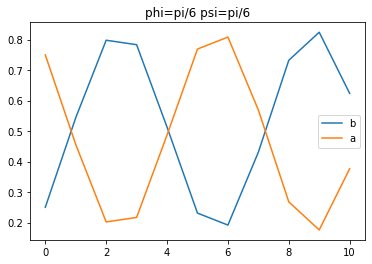

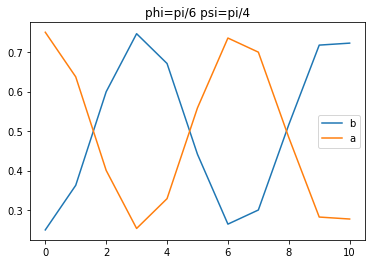

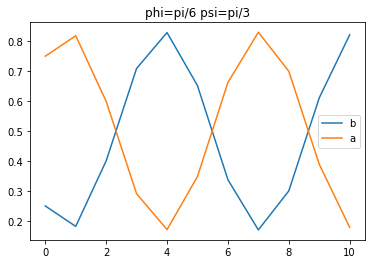

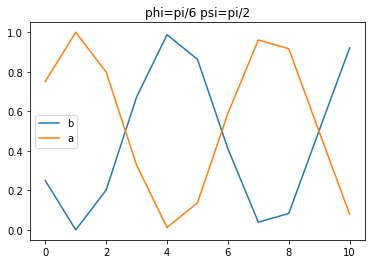

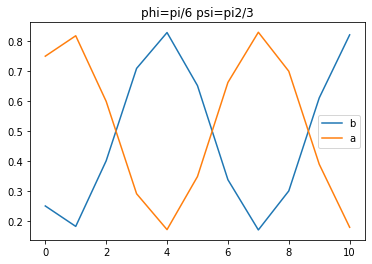

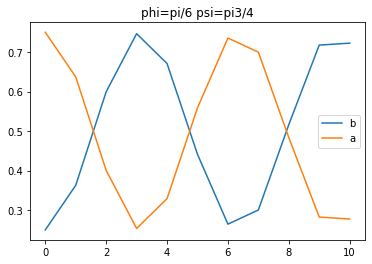

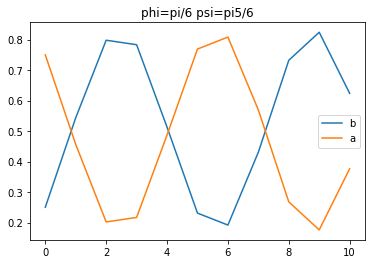

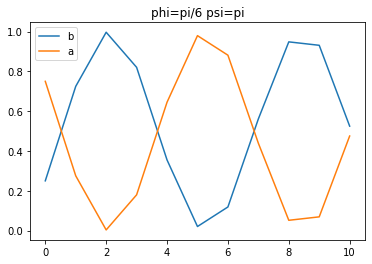

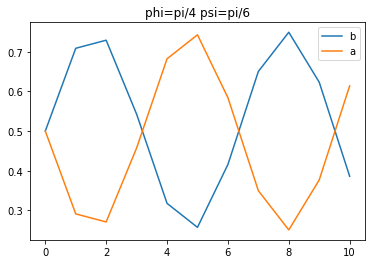

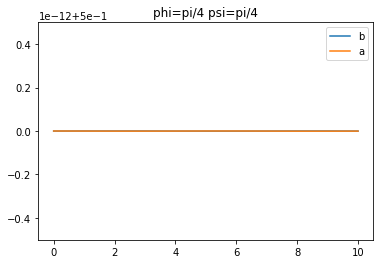

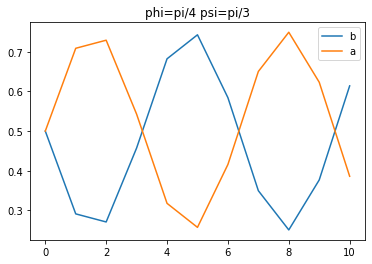

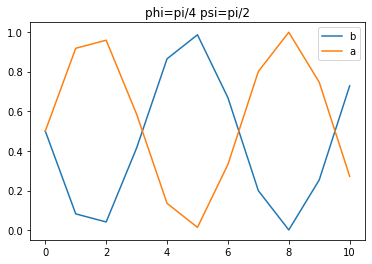

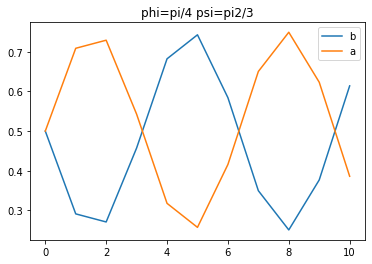

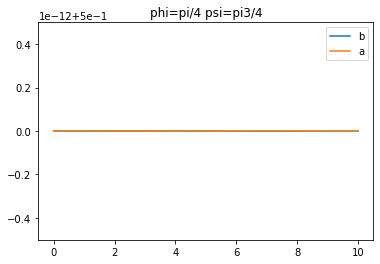

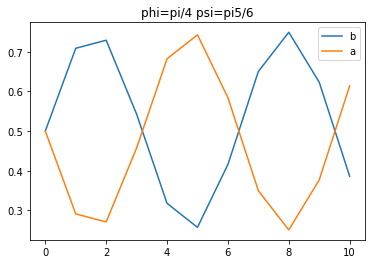

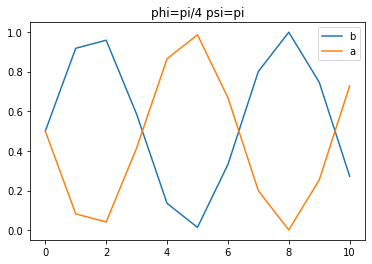

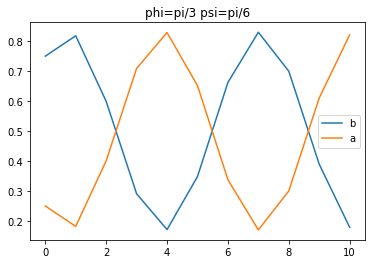

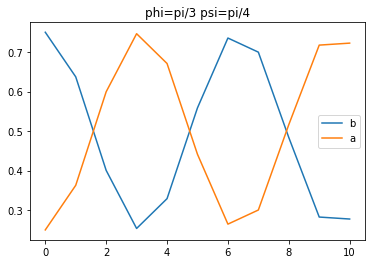

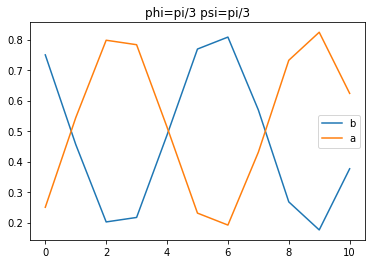

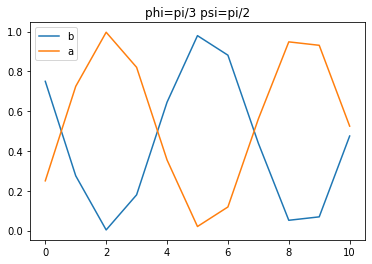

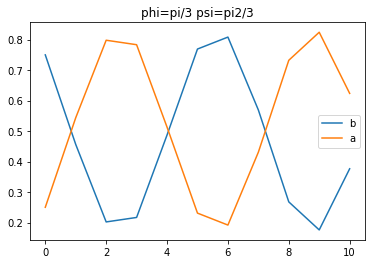

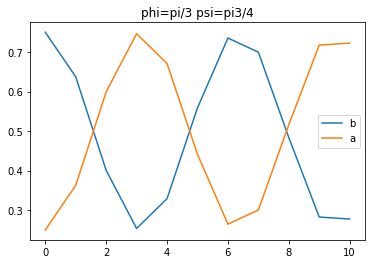

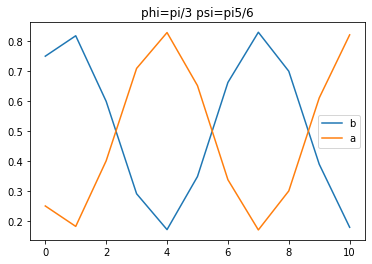

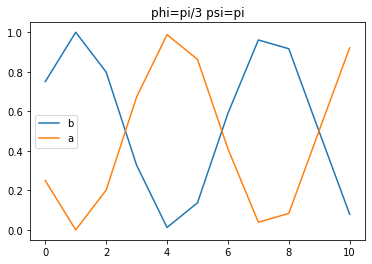

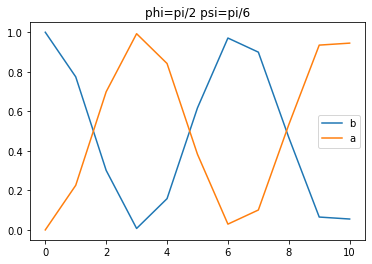

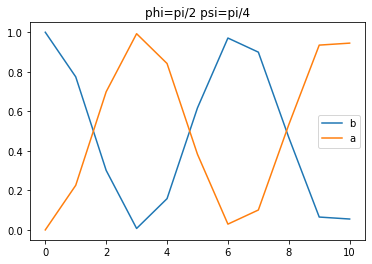

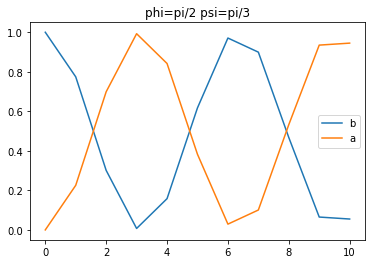

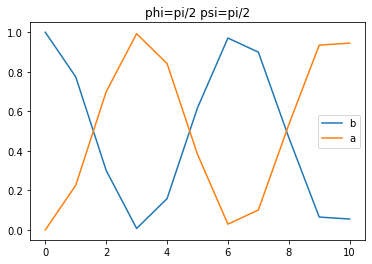

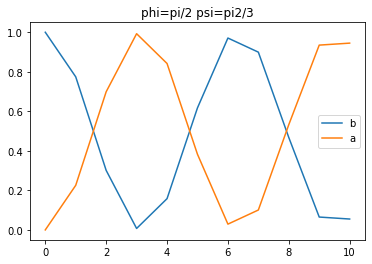

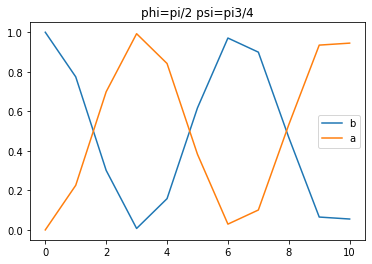

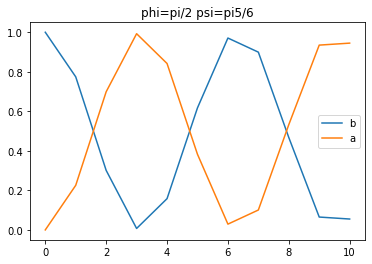

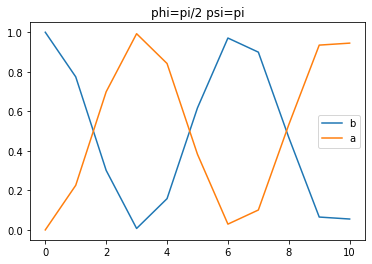

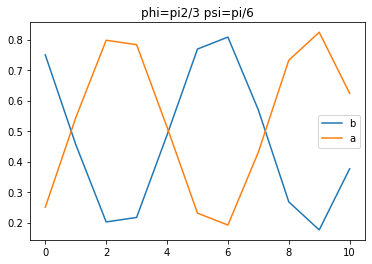

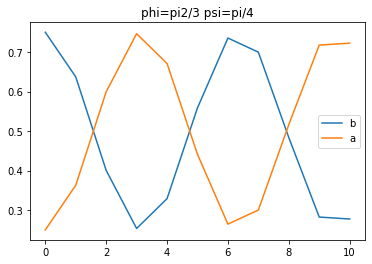

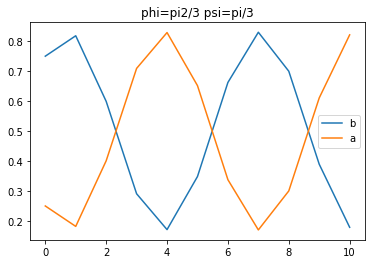

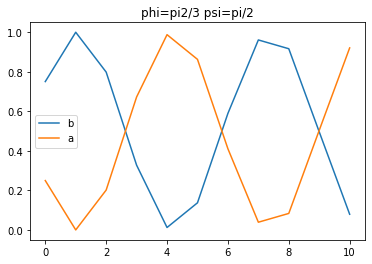

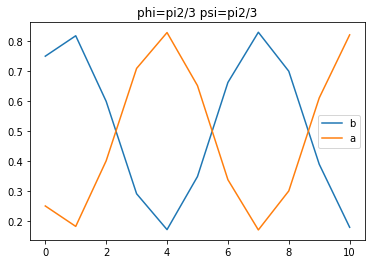

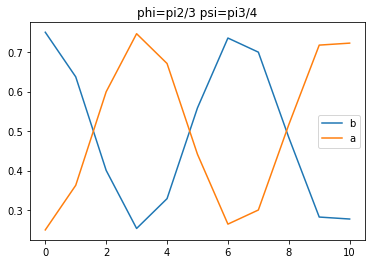

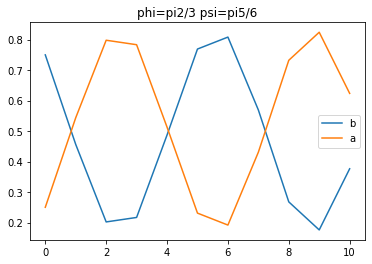

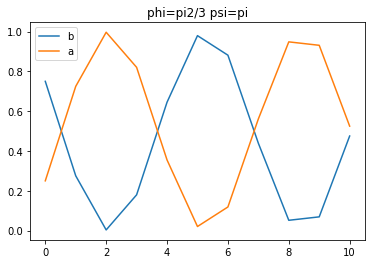

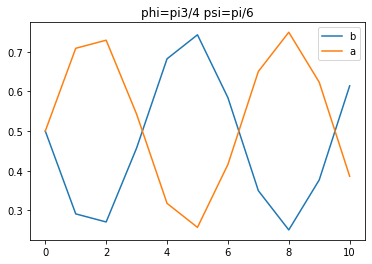

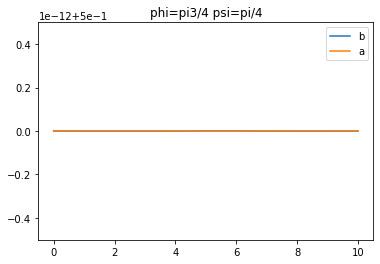

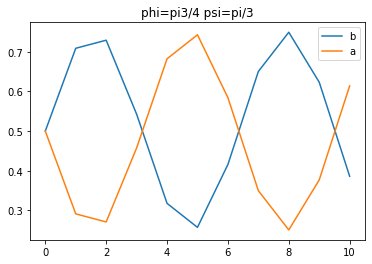

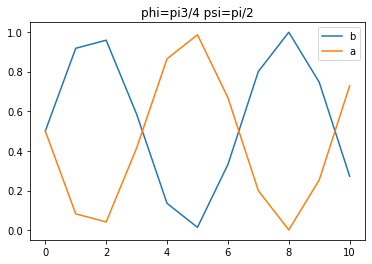

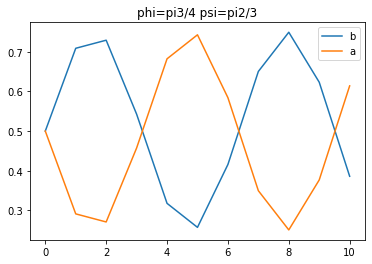

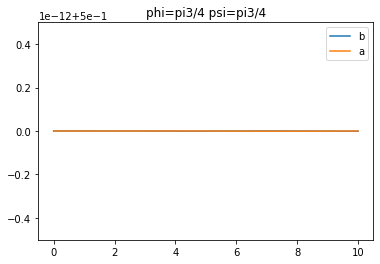

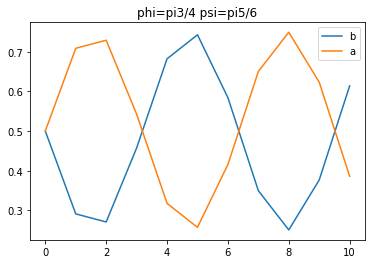

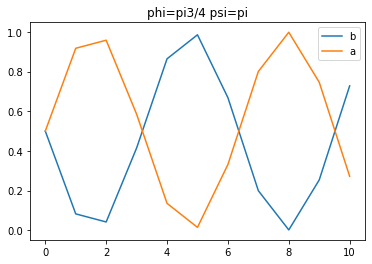

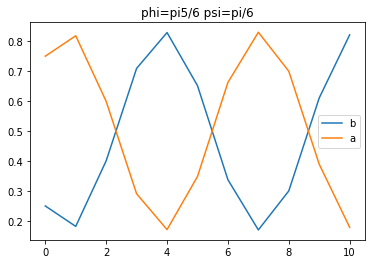

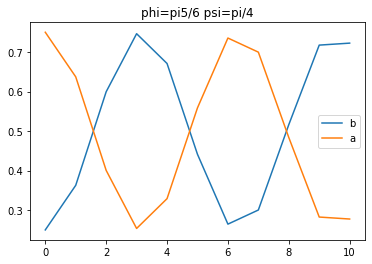

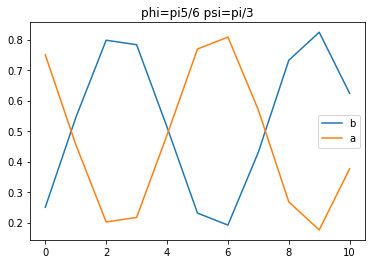

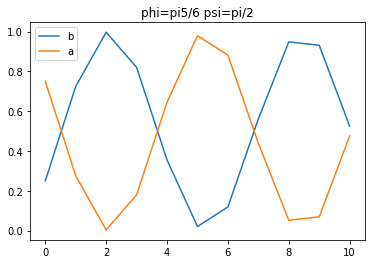

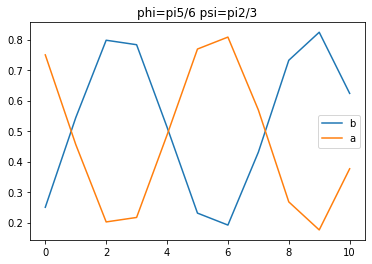

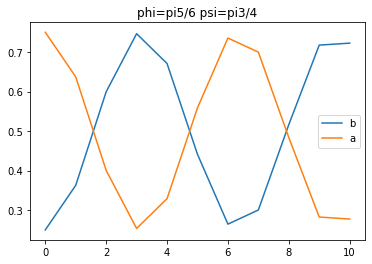

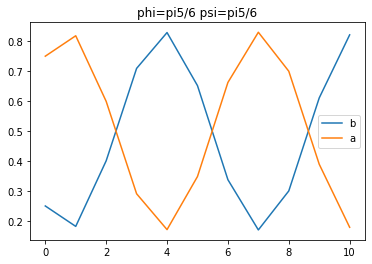

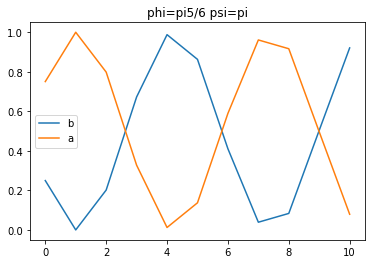

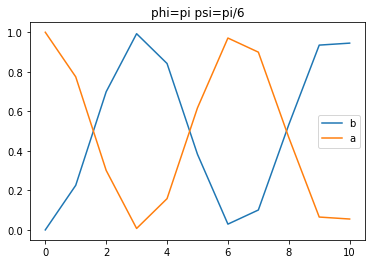

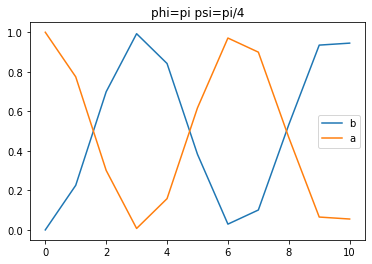

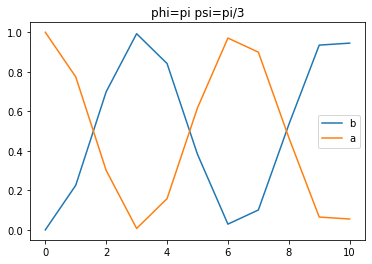

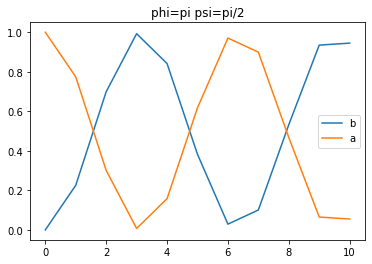

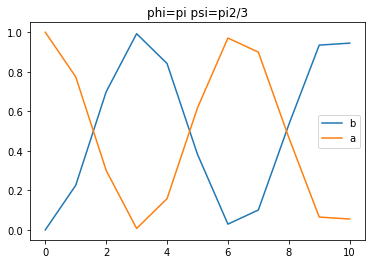

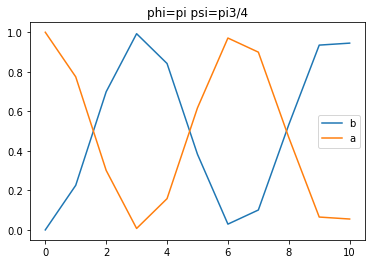

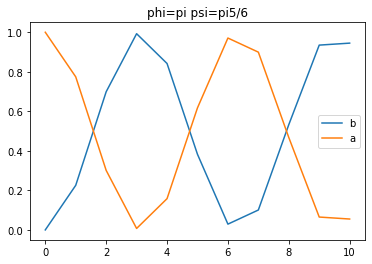

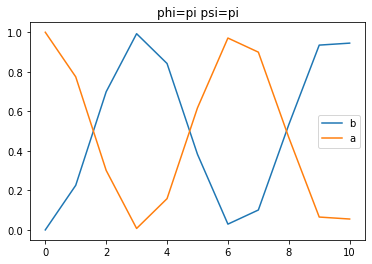

In [ ]:
N = 50
K = 3
theta = 2 * np.arccos(np.sqrt(N-K) / np.sqrt(N))

def plot_amps(theta, phi, psi, title):
    a = cmath.rect(np.cos(phi), psi)
    b = cmath.rect(np.sin(phi), -psi)
    a_r_list = [abs(a)**2]
    b_r_list = [abs(b)**2]
    for _ in range(10):
        new_a = a * np.cos(theta) - b * np.sin(theta)
        new_b = a * np.sin(theta) + b * np.cos(theta)
        a_r_list.append(abs(new_a)**2)
        b_r_list.append(abs(new_b)**2)
        a = new_a
        b = new_b
    plt.title(title)
    plt.plot(b_r_list, label="b")
    plt.plot(a_r_list, label="a")
    plt.legend()
    plt.show()

# phi = np.pi / 8  # 状態sの場合はtheta/2だが今回は色々変えて確認する。
# psi = np.pi / 3
# plot_amps(theta, phi, psi, "phi={} psi={}".format("pi/8", "pi/3"))

phis = [np.pi/ 6, np.pi/4, np.pi / 3, np.pi / 2, np.pi * 2/3, np.pi * 3/ 4, np.pi * 5/6, np.pi]
phi_names = ["pi/6", "pi/4", "pi/3", "pi/2", "pi2/3", "pi3/4", "pi5/6", "pi"]
psis = [np.pi/ 6, np.pi/4, np.pi / 3, np.pi / 2, np.pi * 2/3, np.pi * 3/ 4, np.pi * 5/6, np.pi]
psi_names = ["pi/6", "pi/4", "pi/3", "pi/2", "pi2/3", "pi3/4", "pi5/6", "pi"]
for phi, phi_name in zip(phis, phi_names):
    for psi, psi_name in zip(psis, psi_names):
        plot_amps(theta, phi, psi, "phi={} psi={}".format(phi_name, psi_name))  

一通り確認したところ、位相差が$2\psi=\pi / 2$で、正解と不正解の係数の大きさが一致する($|\sin\phi|=|\cos\phi|$)とき、つまり解の個数がN/2個のとき振動しない事がわかった。計算間違いな気もするがメモとして残しておく。

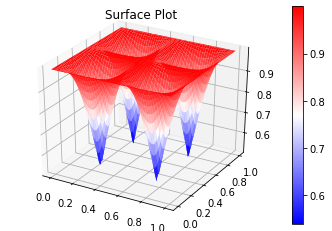

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cmath
%matplotlib inline
N = 50
K = 3
theta = 2 * np.arccos(np.sqrt(N-K) / np.sqrt(N))

def culc_amps(theta, phi, psi):
    a = cmath.rect(np.cos(phi), psi)
    b = cmath.rect(np.sin(phi), -psi)
    a_r_list = [abs(a)**2]
    b_r_list = [abs(b)**2]
    for _ in range(100):
        new_a = a * np.cos(theta) - b * np.sin(theta)
        new_b = a * np.sin(theta) + b * np.cos(theta)
        a_r_list.append(abs(new_a)**2)
        b_r_list.append(abs(new_b)**2)
        a = new_a
        b = new_b
    return np.array(a_r_list), np.array(b_r_list)
N = 100
phis = np.linspace(0, 1, N)
psis = np.linspace(0, 1, N)
Phis, Psis = np.meshgrid(phis, psis)
X = np.c_[np.ravel(Phis), np.ravel(Psis)]
Y_plot = []
for phi, psi in X:
    a_list, b_list = culc_amps(theta, phi*np.pi, psi*np.pi)
    Y_plot.append(b_list.max())
Y_plot = np.array(Y_plot)
Y_plot = Y_plot.reshape(Phis.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Phis, Psis, Y_plot, cmap='bwr', linewidth=0)
fig.colorbar(surf)
ax.set_title("Surface Plot")
fig.show()


$\phi, \psi$について変化させ、bの係数の絶対値の最大値をプロットしたところ、特定の位相で最大値が0.5までしか増幅しない点があり、付近では1にならないことがわかった。$\phi=0$付近（$N\rightarrow\infty$）または$\psi=0$（初期の係数が実数）のときは問題ない。